# Raspberry pi
---

## 系统安装与配置
---

You’ll need an SD card; we recommend a minimum of 8GB micro SD card, and to use the Raspberry Pi Imager to install an operating system onto it.

> https://www.raspberrypi.org/software/

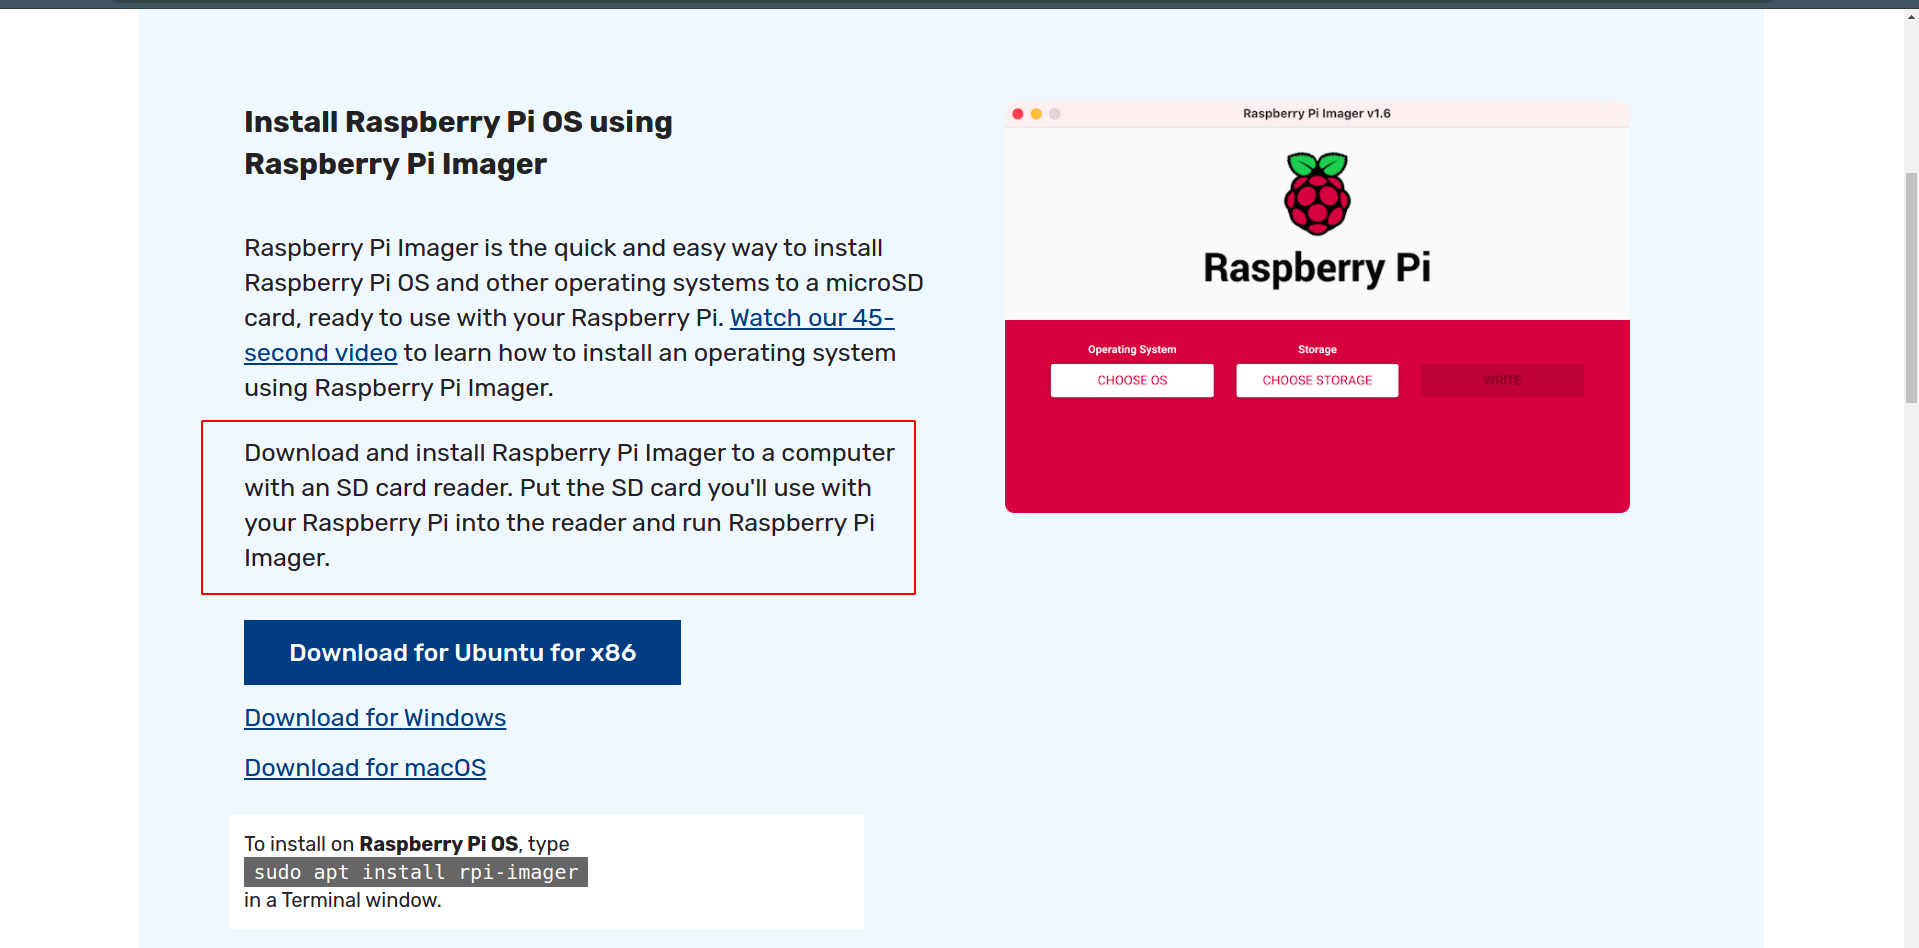


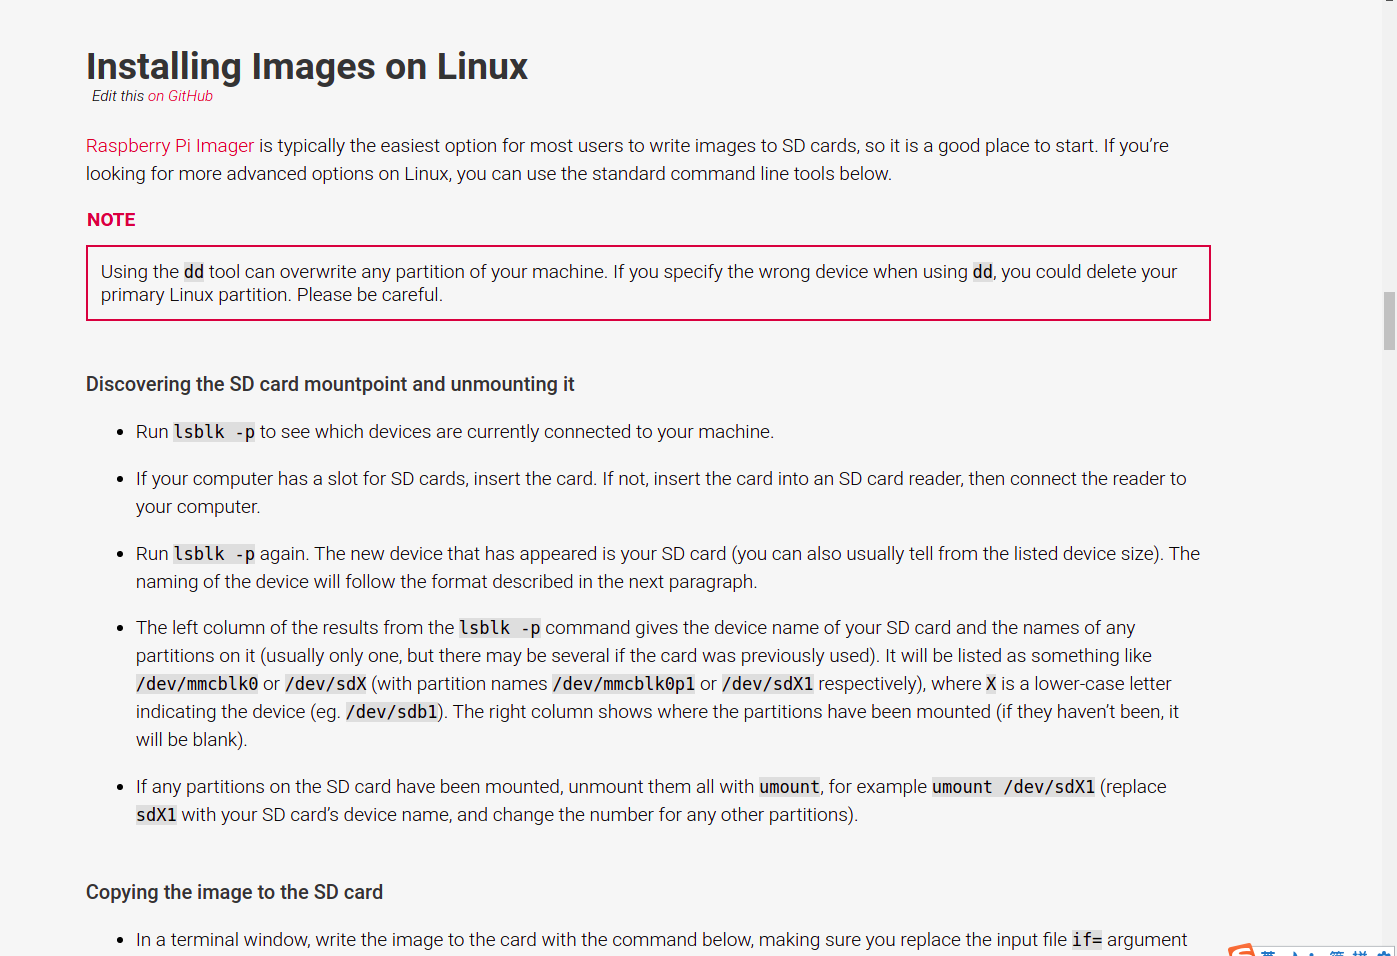

## WiFi 连接
---
### Setup WiFi in Raspberry Pi from Desktop

To ensure WiFi radio is not blocked on your Raspberry Pi, execute the following command:
```
sudo rfkill unblock wlan
```
If your Raspberry Pi is connected to a monitor and keyboard, then configuring the WiFi is very easy. First, to turn ON the WiFi Adapter, click on the up – down arrow in top right corner of the Raspbian Desktop.
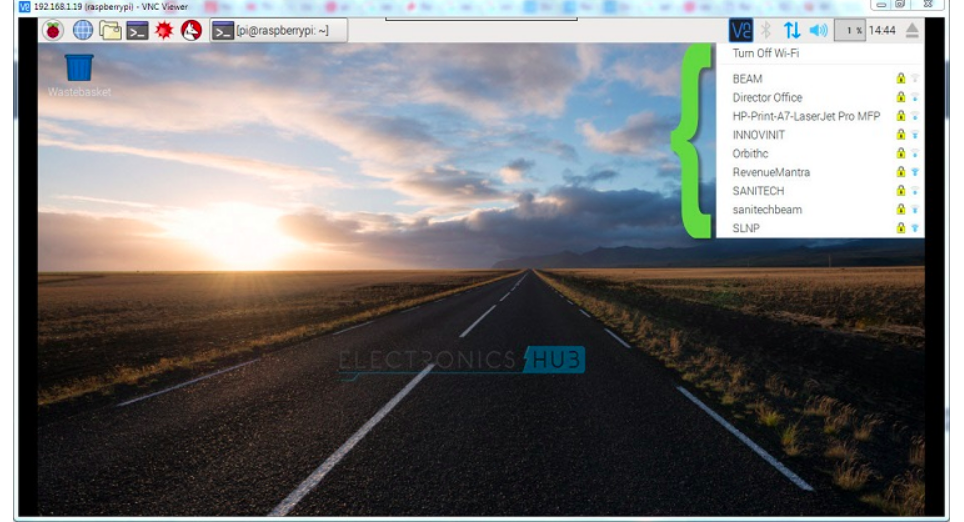

## 远程连接
---
**Virtual Network Computing, or VNC**, is a graphical desktop sharing system that lets its users remotely control a computer while the main user can interact and watch. It is pixel-based, which means it is more flexible than RDP. VNC is platform-independent, which means it can easily be used across Mac, Windows, Linux, Raspberry Pi, and other platforms to share a desktop across different computers, and there are no limits in using VNC applications to connect to different computers on different platforms.  

## 树莓派控制io口
---
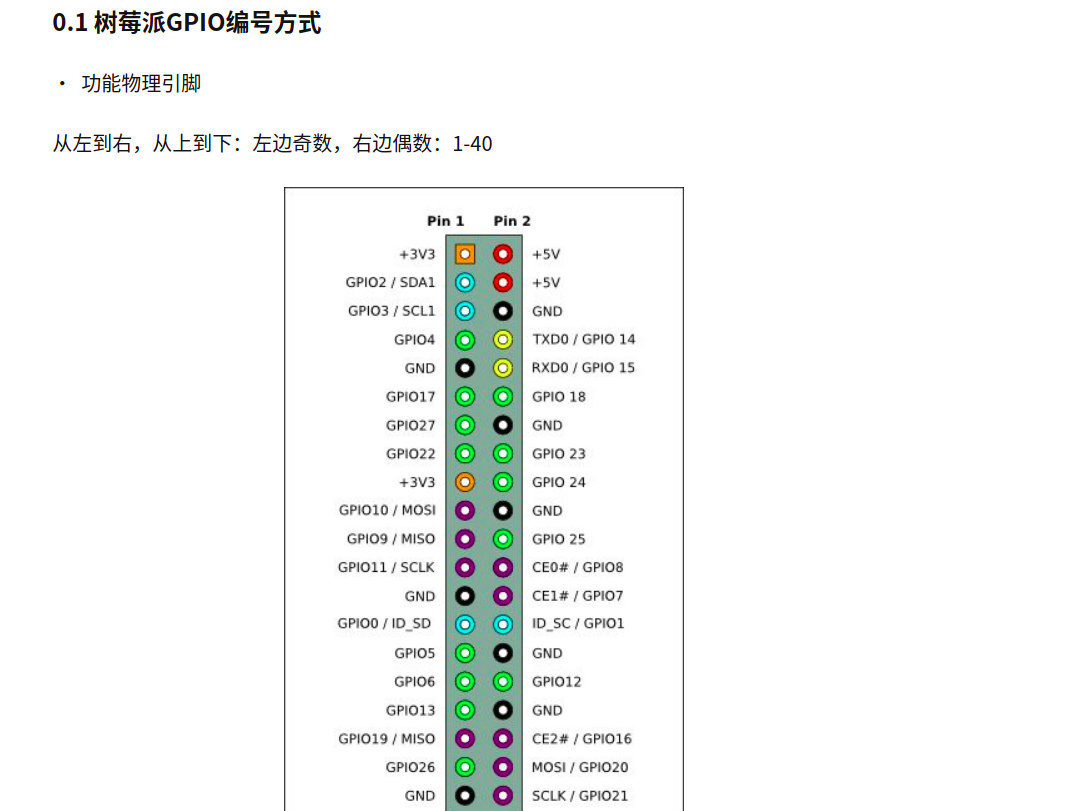

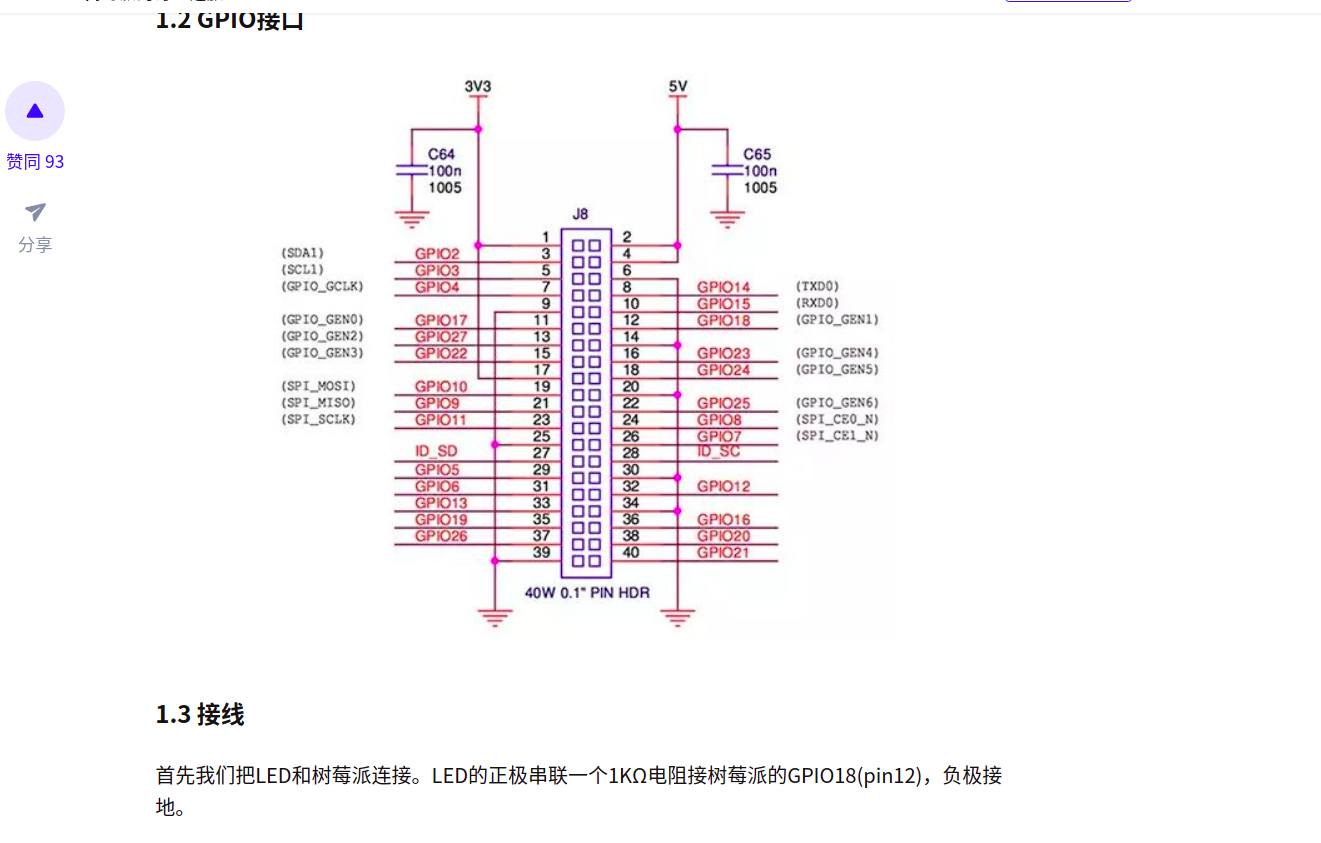

References:
1. https://zhuanlan.zhihu.com/p/40594358

## 树莓派PWM控制舵机的两种方式 
---
### PWM控制舵机简介
通常情况下，伺服电机（舵机）是由一个标准的直流系统和一个内部反馈控制装置（一个减速齿轮和电位计）来组成的。伺服电机（舵机）的主要作用是将齿轮轴旋转到一个预定义的方向上。伺服电机（舵机）有3个输入引脚，GND、VCC和Signal。脉冲宽度调制技术（PWM）被应用于舵机的控制，轴的方向由脉冲的持续时间决定（参见树莓派3 B+Servoblaster 舵机控制，了解更多关于PWM的信息）。需要记住的是，舵机转动的方向不是由占空比决定的，而是由脉冲长度 t 决定的。有的舵机使用的PWM频率为 fPWM=50HZ，其对应于的PWM周期 T=20 ms。脉冲长度 t 和转动方向之间的关系是线性的，但也取决于电机和齿轮的配合。

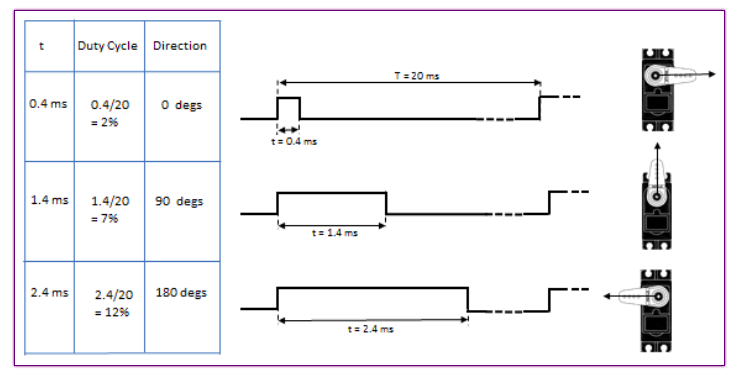

### 树莓派通过软件PWM的方式控制舵机
目的:将一个小舵机直接连接到树莓派的5伏电源上，并使用GPIO数字输出端口采用软件PWM的方式来控制它。

警告:只能使用微型舵机（如：SG90），因为树莓派5 V供电的限制，大型号的舵机电流过大对控制板安全不利。

连接舵机的棕色线(或黑色线)至树莓派的 GND (pin #6), 舵机红色线至树莓派的 5 V (pin #2)，舵机黄色线连接至树莓派的任意 GPIO 输出端口（本文使用pin #22）. 此时舵机由树莓派的 5 V供电, GPIO的控制电压是 3.3 V。（树莓派引脚可参见：树莓派的外部I/O接口）当然我们也可以使用充电宝给舵机供电。

### 树莓派通过PCA9685控制多个舵机
通过软件生成稳定的PWM信号对于运行Linux的树莓派来说是一个很大的挑战，在系统上运行的其他进程可能会随时中断PWM信号的生成。有一个更好的解决方案，那就是使用专门的外部芯片来完成这项工作，特别是当你同时需要几个PWM信号来控制多个舵机的情况下。NXP的PCA9685芯片采用I2C接口可同时产生16个PWM信号。它也被称为“LED控制器”，但控制舵机也没有任何问题。

### 树莓派通过PCA9685控制舵机的python代码
```python
# Servo PCA9685.py
# PCA9685 驱动两个舵机的示例

from smbus import SMBus
from PCA9685 import PWM #从PCA9685引入PWM
import time

fPWM = 50
i2c_address = 0x40 # (standard) 根据连接舵机的接口设置I2C地址
channel = 0 # 舵机连接的控制板接口
a = 8.5 # 与舵机相匹配
b = 2  # 与舵机相匹配

def setup():
    global pwm
    bus = SMBus(1) # Raspberry Pi revision 2
    pwm = PWM(bus, i2c_address)
    pwm.setFreq(fPWM)

def setDirection(direction):
    duty = a / 180 * direction + b
    pwm.setDuty(channel, duty)
    print "direction =", direction, "-> duty =", duty
    time.sleep(1) 
   
print "starting"
setup()
for direction in range(0, 181, 10):
    setDirection(direction)
direction = 0    
setDirection(0)    
print "done"
```

References：
1. https://www.basemu.com/rpi-control-servo-use-pwm.html

## How to Take Photos and Videos with Raspberry Pi Camera Module 
---

### Step 1: What do I need?

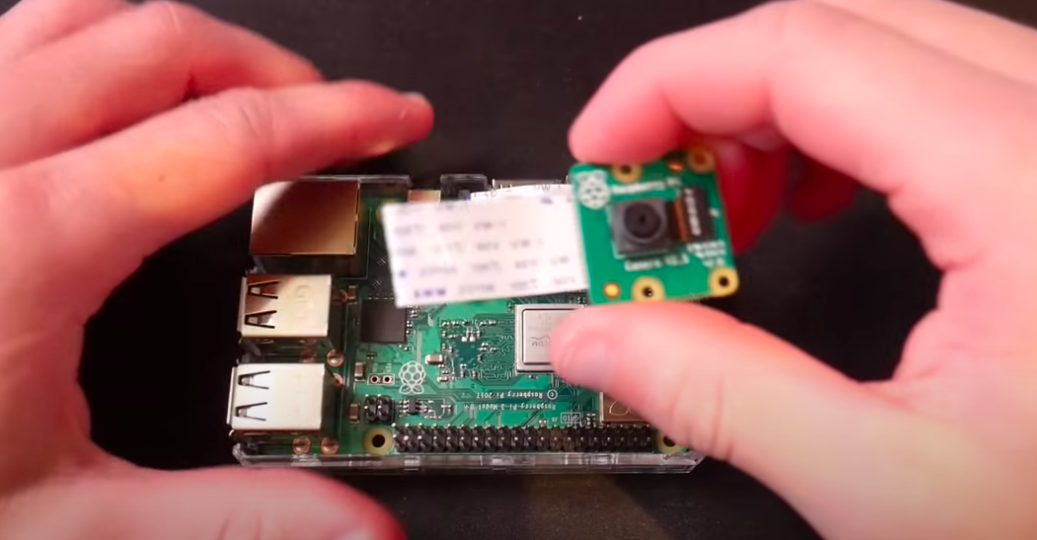

### Step 2: Enable your camera module

Now that you have your Raspberry Pi camera module installed, you need to enable it. Open up a terminal and execute the following command:

```
$ sudo raspi-config
```

This will bring up a screen that looks like this:

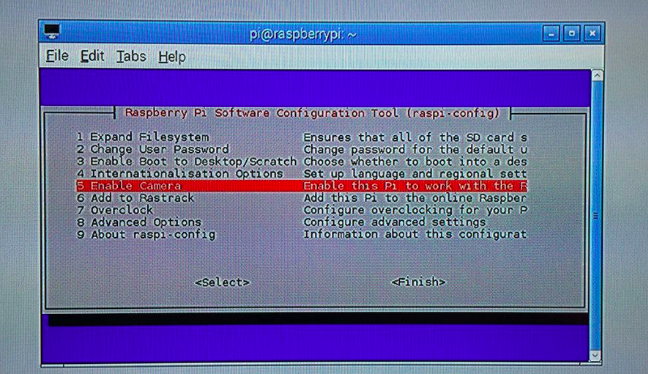

Use your arrow keys to scroll down to Option 5: Enable camera, hit your enter key to enable the camera, and then arrow down to the Finish button and hit enter again. Lastly, you’ll need to reboot your Raspberry Pi for the configuration to take affect.


### Step 3: Test out the camera module
Before we dive into the code, let’s run a quick sanity check to ensure that our Raspberry Pi camera is working properly.

> Note: Trust me, you’ll want to run this sanity check before you start working with the code. It’s always good to ensure that your camera is working prior to diving into OpenCV code, otherwise you could easily waste time wondering when your code isn’t working correctly when it’s simply the camera module itself that is causing you problems.

And from there, I opened up a terminal and executed the following command:

```
$ raspistill -o output.jpg
```

This command activates your Raspberry Pi camera module, displays a preview of the image, and then after a few seconds, snaps a picture, and saves it to your current working directory as output.jpg .


### Step 4: Installing picamera
So at this point we know that our Raspberry Pi camera is working properly. But how do we interface with the Raspberry Pi camera module using Python?

The answer is the picamera module.

Remember from the previous tutorial how we utilized virtualenv and virtualenvwrapper to cleanly install and segment our Python packages from the the system Python and packages?

Well, we’re going to do the same thing here.

Before installing picamera , be sure to activate our cv virtual environment:

```
$ workon cv
```

Note: If you are installing the the picamera module system wide, you can skip the previous commands. However, if you are following along from the previous tutorial, you’ll want to make sure you are in the cv virtual environment before continuing to the next command.

And from there, we can install picamera by utilizing pip:
```
$ pip install "picamera[array]"

```


## What is a PID Controller?
---
A PID controller is an instrument used in industrial control applications to regulate temperature, flow, pressure, speed and other process variables. PID, which stands for proportional integral derivative, controllers use a control loop feedback mechanism to control process variables and are the most accurate and stable controller. 

A PID controller continuously calculates an error value {\displaystyle e(t)}e(t) as the difference between a desired setpoint (SP) and a measured process variable (PV) and applies a correction based on proportional, integral, and derivative terms (denoted P, I, and D respectively), hence the name.

In practical terms it automatically applies an accurate and responsive correction to a control function. An everyday example is the cruise control on a car, where ascending a hill would lower speed if only constant engine power were applied. The controller's PID algorithm restores the measured speed to the desired speed with minimal delay and overshoot by increasing the power output of the engine.

